In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def folder_images(path):
    images = []
    for filename in tqdm(os.listdir(path)):
        img = cv2.imread(os.path.join(path,filename))
        if img is not None:
            images.append(img)
    return images

In [4]:
path= '/content/drive/MyDrive/ultrasound/images_u/malignant_cases'
original_images = folder_images(path)
print('number of images : ',len(original_images))
print('resolution of images : ',original_images[2].shape)

100%|██████████| 211/211 [00:04<00:00, 47.20it/s]

number of images :  211
resolution of images :  (463, 546, 3)


100%|██████████| 211/211 [00:00<00:00, 2504.84it/s]

211 (571, 933)


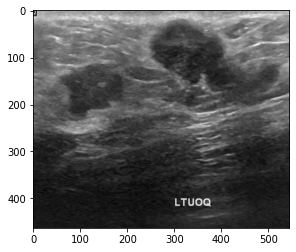

In [5]:
def original_gray(original):  #function to convert images from bgr to grayscale
    gray_img = cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
    return gray_img
gray_images = [] #oringinal/base mammogram images 
for img in tqdm(original_images): 
    gray_images.append(original_gray(img))    

print(len(gray_images),gray_images[0].shape)
plt.imshow(gray_images[2], cmap='gray')

100%|██████████| 211/211 [00:00<00:00, 2268.48it/s]


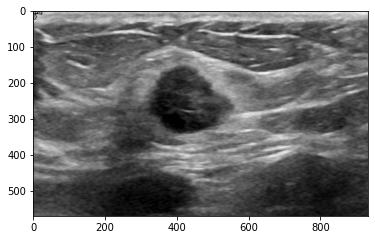

In [6]:
#median blurred images
def median_blur(denoise):
    denoise = cv2.medianBlur(denoise,3)
    return denoise
median_images = []
for img in tqdm(gray_images): 
    median_images.append(median_blur(img))

plt.imshow(median_images[0],cmap='gray')


In [7]:
def arti_removal(median_img):
    hh,ww = median_img.shape[:2]
    thresh = cv2.threshold(median_img,0,255,cv2.THRESH_OTSU)[1] 
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    morph = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

    contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    big_contour = max(contours, key=cv2.contourArea)

    mask = np.zeros((hh,ww), dtype=np.uint8)
    cv2.drawContours(mask, [big_contour], 0, 255, cv2.FILLED)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (55,55))
    mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)

    result = cv2.bitwise_and(img, img, mask=mask)
    
    return result
    

100%|██████████| 211/211 [00:05<00:00, 36.90it/s]


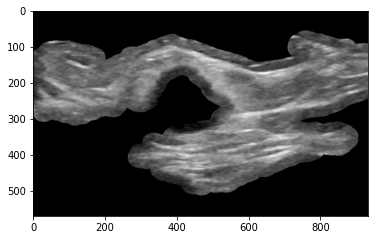

In [8]:
result_images = []
for img in tqdm(median_images):
    result_images.append(arti_removal(img))

plt.imshow(result_images[0],cmap='gray')

In [ ]:
def clahe(artiless_img):
    clahe = cv2.createCLAHE(clipLimit = 5)
    clahe_img = clahe.apply(artiless_img) + 0
    return clahe_img

100%|██████████| 51/51 [00:00<00:00, 95.60it/s]


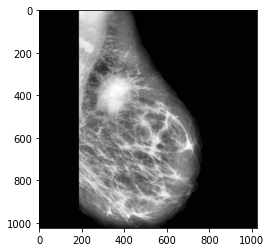

In [ ]:
clahe_images = []
for img in tqdm(result_images):
    clahe_images.append(clahe(img))

plt.imshow(clahe_images[0],cmap='gray')



In [ ]:
original = []
original_f = []
for root, directory, file in tqdm(os.walk(path)):
    for f in file:
      if f.endswith('.png'):
        if 'mdb' in f:
          original_f.append(f)
          original.append(root + '/' + f)
          


1it [00:00, 81.11it/s]


In [ ]:
original_f

['mdb088.png',
 'mdb047.png',
 'mdb143.png',
 'mdb172.png',
 'mdb243.png',
 'mdb113.png',
 'mdb162.png',
 'mdb279.png',
 'mdb303.png',
 'mdb304.png',
 'mdb159.png',
 'mdb174.png',
 'mdb305.png',
 'mdb116.png',
 'mdb180.png',
 'mdb053.png',
 'mdb280.png',
 'mdb027.png',
 'mdb263.png',
 'mdb100.png',
 'mdb302.png',
 'mdb040.png',
 'mdb230.png',
 'mdb049.png',
 'mdb237.png',
 'mdb147.png',
 'mdb114.png',
 'mdb224.png',
 'mdb318.png',
 'mdb301.png',
 'mdb242.png',
 'mdb061.png',
 'mdb228.png',
 'mdb293.png',
 'mdb185.png',
 'mdb067.png',
 'mdb103.png',
 'mdb057.png',
 'mdb283.png',
 'mdb306.png',
 'mdb073.png',
 'mdb177.png',
 'mdb077.png',
 'mdb287.png',
 'mdb176.png',
 'mdb004.png',
 'mdb018.png',
 'mdb251.png',
 'mdb246.png',
 'mdb210.png',
 'mdb161.png',
 'mdb094.png',
 'mdb234.png',
 'mdb220.png',
 'mdb036.png',
 'mdb255.png',
 'mdb055.png',
 'mdb309.png',
 'mdb131.png',
 'mdb123.png',
 'mdb168.png',
 'mdb297.png',
 'mdb089.png',
 'mdb189.png',
 'mdb112.png',
 'mdb156.png',
 'mdb321.p

In [ ]:
#new_path = '/content/drive/MyDrive/MINI_MIAS/normal_processed_dump'
#for i in original_f:
i=0
for img in tqdm(clahe_images):
    image = cv2.imwrite('/content/drive/MyDrive/MINI_MIAS/normal_processed_dump/{}.jpg'.format(i),img) 
    i=i+1

100%|██████████| 207/207 [00:04<00:00, 48.75it/s]


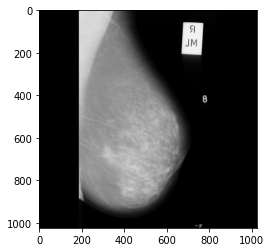

In [ ]:
image = cv2.imread('/content/drive/MyDrive/MINI_MIAS/malignant_cases/mdb058.png')
plt.imshow(image,cmap='gray')

In [ ]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
median = cv2.medianBlur(gray,3)




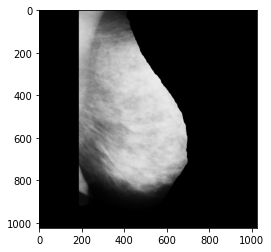

In [ ]:
def arti_removal(median_img):
    hh,ww = median_img.shape[:2]
    thresh = cv2.threshold(median_img,0,255,cv2.THRESH_OTSU)[1] 
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    morph = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

    contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    big_contour = max(contours, key=cv2.contourArea)

    mask = np.zeros((hh,ww), dtype=np.uint8)
    cv2.drawContours(mask, [big_contour], 0, 255, cv2.FILLED)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (55,55))
    mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)

    result = cv2.bitwise_and(img, img, mask=mask)
    
    return result


arti = arti_removal(median)
plt.imshow(arti,cmap='gray')    

In [ ]:
def clahe(artiless_img):
    clahe = cv2.createCLAHE(clipLimit = 5)
    clahe_img = clahe.apply(artiless_img) + 0
    return clahe_img
clahe_image = clahe(arti)
plt.imshow(clahe_image,cmap='gray')    

error: ignored